In [37]:
'''
python3 mavproxy.py --master=/dev/ttyUSB0 --baudrate 921600 --aircraft MyCopter

module load log
log list
log download 3
log download all
log erase

'''
import os
import sys
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import math
from LatLongUTMconversion import LLtoUTM, UTMtoLL
import mission_plan as mp
from pymavlink import mavutil
import pandas as pd


In [38]:
# Function definitions

def dist_2points(x1, y1, x2, y2):
    distance = math.sqrt(((x1-x2)**2)+((y1-y2)**2))
    return distance

def get_offset_coords(x, y, slope, dist):
    new_x = x + dist*math.sqrt( 1/(1+math.pow(slope,2)) )
    new_y = y + slope*dist*math.sqrt( 1/(1+math.pow(slope,2)) )
    return(new_x,new_y)

In [39]:
# allow import from the parent directory, where mavlink.py is
# sys.path.insert(0, os.path.join(os.path.dirname(os.path.realpath(__file__)), '..'))

log_dir = '/home/user1/Downloads/APM_MAY27Flights/LOGS/'
filename = log_dir + "00000010.BIN"
notimestamps = True
planner_format = True
m_type=['GPA', 'GPS', 'AHR2']
mlog = mavutil.mavlink_connection(filename, planner_format,
                                  notimestamps,
                                  robust_parsing=True)
if False:
    while True:
        m = mlog.recv_match(condition=None, type=m_type, blocking=True)
        if m is None:
            break
        if notimestamps:
            print("%s" % m)
        else:
            print("%s.%02u: %s" % (
                time.strftime("%Y-%m-%d %H:%M:%S",
                              time.localtime(m._timestamp)),
                int(m._timestamp*100.0)%100, m))

In [40]:
gps_list =[]
gpa_list =[]
ahr2_list = []


while True:
    m = mlog.recv_match(condition=None, type=m_type, blocking=True)
    if m is None:
        break    
    elif m.get_type() == 'AHR2':
        print("%s" % m)
        ahr2_list.append(m.to_dict())
    elif m.get_type() == 'GPS':
        print("%s" % m)
        gps_list.append(m.to_dict())
    elif m.get_type() == 'GPA':
        print("%s" % m)
        gpa_list.append(m.to_dict())
        


AHR2 {TimeUS : 119130020, Roll : 2.22, Pitch : 0.23, Yaw : 20.44, Alt : 5.089999675750732, Lat : 41.3907435, Lng : -73.9533983, Q1 : 0.9839511513710022, Q2 : 0.018749743700027466, Q3 : 0.0055020274594426155, Q4 : 0.17736491560935974}
GPS {TimeUS : 119172957, Status : 3, GMS : 336293600, GWk : 2107, NSats : 12, HDop : 0.9400000000000001, Lat : 41.3907437, Lng : -73.9533984, Alt : 4.32, Spd : 0.14500001072883606, GCrs : 0.0, VZ : -0.0820000022649765, Yaw : 0.0, U : 1}
GPA {TimeUS : 119172957, VDop : 1.67, HAcc : 1.33, VAcc : 2.05, SAcc : 0.7000000000000001, YAcc : 0.0, VV : 1, SMS : 119146, Delta : 200}
AHR2 {TimeUS : 119230052, Roll : 2.21, Pitch : 0.19, Yaw : 20.43, Alt : 5.029999732971191, Lat : 41.3907437, Lng : -73.9533984, Q1 : 0.9839586615562439, Q2 : 0.01869828999042511, Q3 : 0.005071746185421944, Q4 : 0.17734135687351227}
AHR2 {TimeUS : 119331760, Roll : 2.16, Pitch : 0.2, Yaw : 20.43, Alt : 5.039999961853027, Lat : 41.3907437, Lng : -73.9533984, Q1 : 0.9839692115783691, Q2 : 0.

AHR2 {TimeUS : 221403788, Roll : 6.0200000000000005, Pitch : -0.5, Yaw : 148.77, Alt : 23.510000228881836, Lat : 41.3916228, Lng : -73.9530664, Q1 : 0.2685066759586334, Q2 : 0.01839522272348404, Q3 : 0.04941299557685852, Q4 : 0.9618337750434875}
AHR2 {TimeUS : 221508284, Roll : 6.09, Pitch : 0.08, Yaw : 142.87, Alt : 23.8799991607666, Lat : 41.3916228, Lng : -73.9530664, Q1 : 0.3179346024990082, Q2 : 0.016253748908638954, Q3 : 0.05064533278346062, Q4 : 0.9466195702552795}
GPS {TimeUS : 221600920, Status : 3, GMS : 336396000, GWk : 2107, NSats : 13, HDop : 0.86, Lat : 41.3916228, Lng : -73.95306649999999, Alt : 17.31, Spd : 0.12200000882148743, GCrs : 299.09088134765625, VZ : 0.18000000715255737, Yaw : 0.0, U : 1}
GPA {TimeUS : 221600920, VDop : 1.47, HAcc : 2.18, VAcc : 3.84, SAcc : 0.62, YAcc : 0.0, VV : 1, SMS : 221554, Delta : 200}
AHR2 {TimeUS : 221611242, Roll : 5.57, Pitch : 1.1, Yaw : 136.83, Alt : 23.469999313354492, Lat : 41.3916228, Lng : -73.95306649999999, Q1 : 0.3677956759

GPA {TimeUS : 1112822937, VDop : 1.29, HAcc : 0.62, VAcc : 1.1500000000000001, SAcc : 0.24, YAcc : 0.0, VV : 1, SMS : 1112780, Delta : 200}
AHR2 {TimeUS : 1112875764, Roll : 2.32, Pitch : 0.28, Yaw : 17.830000000000002, Alt : 5.239999771118164, Lat : 41.3907337, Lng : -73.95339799999999, Q1 : 0.9877136945724487, Q2 : 0.019666314125061035, Q3 : 0.005620153620839119, Q4 : 0.15493027865886688}
AHR2 {TimeUS : 1112976245, Roll : 2.33, Pitch : 0.28, Yaw : 17.82, Alt : 5.400000095367432, Lat : 41.3907337, Lng : -73.95339799999999, Q1 : 0.987727701663971, Q2 : 0.019719772040843964, Q3 : 0.005574542563408613, Q4 : 0.15483585000038147}
GPS {TimeUS : 1113023228, Status : 3, GMS : 337287400, GWk : 2107, NSats : 14, HDop : 0.78, Lat : 41.390733499999996, Lng : -73.95339799999999, Alt : 1.85, Spd : 0.04400000348687172, GCrs : 331.78118896484375, VZ : -0.02800000086426735, Yaw : 0.0, U : 1}
GPA {TimeUS : 1113023228, VDop : 1.29, HAcc : 0.62, VAcc : 1.1500000000000001, SAcc : 0.18, YAcc : 0.0, VV : 1,

GPS {TimeUS : 1203418155, Status : 3, GMS : 337377800, GWk : 2107, NSats : 15, HDop : 0.71, Lat : 41.3915918, Lng : -73.9529606, Alt : 19.3, Spd : 3.0890002250671387, GCrs : 296.15118408203125, VZ : 0.026000000536441803, Yaw : 0.0, U : 1}
GPA {TimeUS : 1203418155, VDop : 1.22, HAcc : 0.56, VAcc : 1.02, SAcc : 0.13, YAcc : 0.0, VV : 1, SMS : 1203392, Delta : 200}
AHR2 {TimeUS : 1203506917, Roll : -1.69, Pitch : -1.51, Yaw : 295.7, Alt : 23.43000030517578, Lat : 41.3915918, Lng : -73.9529606, Q1 : 0.846415102481842, Q2 : -0.01958511210978031, Q3 : -0.0033119989093393087, Q4 : -0.5321531295776367}
AHR2 {TimeUS : 1203611814, Roll : -1.9000000000000001, Pitch : -0.77, Yaw : 295.51, Alt : 22.779998779296875, Lat : 41.3915918, Lng : -73.9529606, Q1 : 0.8455801010131836, Q2 : -0.017676949501037598, Q3 : 0.0031988697592169046, Q4 : -0.5335462093353271}
GPS {TimeUS : 1203626057, Status : 3, GMS : 337378000, GWk : 2107, NSats : 15, HDop : 0.71, Lat : 41.3915942, Lng : -73.9529672, Alt : 19.3, Spd

AHR2 {TimeUS : 1852630722, Roll : 2.52, Pitch : 0.41000000000000003, Yaw : 20.13, Alt : 6.190000057220459, Lat : 41.3907418, Lng : -73.9534177, Q1 : 0.9843780398368835, Q2 : 0.021024176850914955, Q3 : 0.007408635690808296, Q4 : 0.1746509075164795}
GPS {TimeUS : 1852648239, Status : 3, GMS : 338027000, GWk : 2107, NSats : 14, HDop : 0.78, Lat : 41.390741999999996, Lng : -73.953418, Alt : -7.71, Spd : 0.03100000135600567, GCrs : 305.0544128417969, VZ : -0.09100000560283661, Yaw : 0.0, U : 1}
GPA {TimeUS : 1852648239, VDop : 1.23, HAcc : 2.85, VAcc : 5.1000000000000005, SAcc : 0.76, YAcc : 0.0, VV : 1, SMS : 1852607, Delta : 200}
AHR2 {TimeUS : 1852730846, Roll : 2.46, Pitch : 0.35000000000000003, Yaw : 20.12, Alt : 6.289999961853027, Lat : 41.390741999999996, Lng : -73.953418, Q1 : 0.9843907356262207, Q2 : 0.020629651844501495, Q3 : 0.006840299349278212, Q4 : 0.17464973032474518}
GPS {TimeUS : 1852828762, Status : 3, GMS : 338027200, GWk : 2107, NSats : 14, HDop : 0.78, Lat : 41.3907422,

GPS {TimeUS : 1944243054, Status : 3, GMS : 338118600, GWk : 2107, NSats : 15, HDop : 0.71, Lat : 41.391505599999995, Lng : -73.95312679999999, Alt : 11.84, Spd : 3.205000162124634, GCrs : 197.584716796875, VZ : -0.08300000429153442, Yaw : 0.0, U : 1}
GPA {TimeUS : 1944243054, VDop : 1.19, HAcc : 2.19, VAcc : 3.92, SAcc : 0.64, YAcc : 0.0, VV : 1, SMS : 1944210, Delta : 200}
AHR2 {TimeUS : 1944339881, Roll : 5.1000000000000005, Pitch : 3.14, Yaw : 114.31, Alt : 22.619998931884766, Lat : 41.391505599999995, Lng : -73.95312679999999, Q1 : 0.5426212549209595, Q2 : 0.0010803845943883061, Q3 : 0.052241601049900055, Q4 : 0.8383506536483765}
AHR2 {TimeUS : 1944444842, Roll : 5.51, Pitch : 2.5500000000000003, Yaw : 114.25, Alt : 23.100000381469727, Lat : 41.391505599999995, Lng : -73.95312679999999, Q1 : 0.5428739786148071, Q2 : 0.007367538288235664, Q3 : 0.05246307700872421, Q4 : 0.8381414413452148}
GPS {TimeUS : 1944451943, Status : 3, GMS : 338118800, GWk : 2107, NSats : 15, HDop : 0.71, La

GPS {TimeUS : 2827882200, Status : 3, GMS : 339002200, GWk : 2107, NSats : 15, HDop : 0.7000000000000001, Lat : 41.3907094, Lng : -73.9533579, Alt : 18.39, Spd : 0.14100000262260437, GCrs : 275.04962158203125, VZ : -1.28000009059906, Yaw : 0.0, U : 1}
GPA {TimeUS : 2827882200, VDop : 1.08, HAcc : 2.09, VAcc : 3.88, SAcc : 0.65, YAcc : 0.0, VV : 1, SMS : 2827844, Delta : 200}
AHR2 {TimeUS : 2827961683, Roll : -1.57, Pitch : 6.62, Yaw : 21.28, Alt : 25.25, Lat : 41.3907094, Lng : -73.9533579, Q1 : 0.980923593044281, Q2 : -0.024157153442502022, Q3 : 0.054244957864284515, Q4 : 0.18510212004184723}
AHR2 {TimeUS : 2828066732, Roll : -0.75, Pitch : 6.2700000000000005, Yaw : 21.41, Alt : 25.309999465942383, Lat : 41.3907094, Lng : -73.9533579, Q1 : 0.9810212254524231, Q2 : -0.016621295362710953, Q3 : 0.05252588167786598, Q4 : 0.18590863049030304}
GPS {TimeUS : 2828071238, Status : 3, GMS : 339002400, GWk : 2107, NSats : 15, HDop : 0.7000000000000001, Lat : 41.390709699999995, Lng : -73.9533575

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [48]:
for item in ahr2_list:     
    print('%.7f, %.7f ' %(item['Lat'], item['Lng']))


41.3907435, -73.9533983 
41.3907437, -73.9533984 
41.3907437, -73.9533984 
41.3907439, -73.9533986 
41.3907439, -73.9533986 
41.3907440, -73.9533986 
41.3907440, -73.9533986 
41.3907440, -73.9533986 
41.3907440, -73.9533986 
41.3907441, -73.9533987 
41.3907441, -73.9533987 
41.3907441, -73.9533988 
41.3907441, -73.9533988 
41.3907443, -73.9533989 
41.3907443, -73.9533989 
41.3907444, -73.9533988 
41.3907444, -73.9533988 
41.3907445, -73.9533987 
41.3907445, -73.9533987 
41.3907445, -73.9533986 
41.3907445, -73.9533986 
41.3907444, -73.9533986 
41.3907444, -73.9533986 
41.3907444, -73.9533985 
41.3907444, -73.9533985 
41.3907444, -73.9533985 
41.3907444, -73.9533985 
41.3907443, -73.9533985 
41.3907443, -73.9533985 
41.3907444, -73.9533985 
41.3907444, -73.9533985 
41.3907443, -73.9533984 
41.3907443, -73.9533984 
41.3907442, -73.9533985 
41.3907442, -73.9533985 
41.3907443, -73.9533988 
41.3907443, -73.9533988 
41.3907446, -73.9533990 
41.3907446, -73.9533990 
41.3907447, -73.9533991 


41.3913130, -73.9532216 
41.3913130, -73.9532216 
41.3913077, -73.9532243 
41.3913077, -73.9532243 
41.3913024, -73.9532269 
41.3913024, -73.9532269 
41.3912972, -73.9532294 
41.3912972, -73.9532294 
41.3912920, -73.9532319 
41.3912920, -73.9532319 
41.3912869, -73.9532346 
41.3912869, -73.9532346 
41.3912817, -73.9532372 
41.3912817, -73.9532372 
41.3912764, -73.9532394 
41.3912764, -73.9532394 
41.3912710, -73.9532412 
41.3912710, -73.9532412 
41.3912662, -73.9532435 
41.3912662, -73.9532435 
41.3912610, -73.9532460 
41.3912556, -73.9532486 
41.3912556, -73.9532486 
41.3912505, -73.9532512 
41.3912505, -73.9532512 
41.3912454, -73.9532539 
41.3912454, -73.9532539 
41.3912402, -73.9532566 
41.3912402, -73.9532566 
41.3912349, -73.9532596 
41.3912349, -73.9532596 
41.3912292, -73.9532624 
41.3912292, -73.9532624 
41.3912236, -73.9532653 
41.3912236, -73.9532653 
41.3912180, -73.9532683 
41.3912180, -73.9532683 
41.3912126, -73.9532715 
41.3912126, -73.9532715 
41.3912075, -73.9532747 


<IPython.core.display.Javascript object>


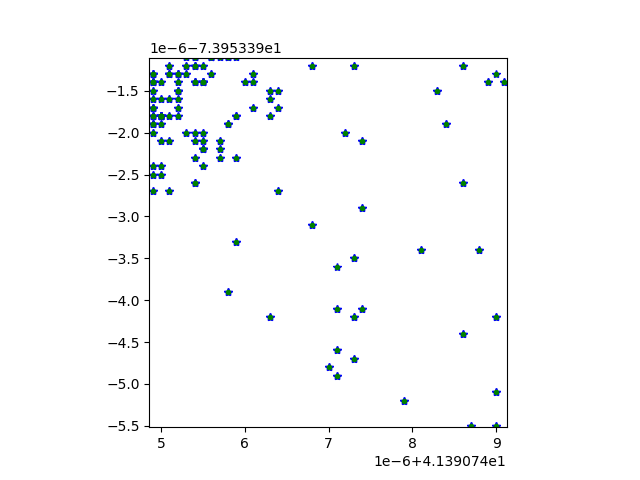

(41.390555645, 41.391681055, -73.95351319999999, -73.95238778999999)

In [52]:

%matplotlib notebook
ahr2_loc = pd.DataFrame(ahr2_list)

plt.figure(1)
plt.plot(ahr2_loc['Lat'], ahr2_loc['Lng'], 'b*')

gps_loc = pd.DataFrame(gps_list)
plt.plot(gps_loc['Lat'], gps_loc['Lng'], 'g.')
plt.axis('square')

